#### Reshape vs View

- reshape()

Returns a tensor with the same data and number of elements as input, but with the specified shape. **When possible, the returned tensor will be a view of input. Otherwise, it will be a copy.** Contiguous inputs and inputs with compatible strides can be reshaped without copying, but you should not depend on the copying vs. viewing behavior.

- view()
For a tensor to be viewed, the new view size must be compatible with its original size and stride,

##### Summarised:: 
    - If you need the same storage use view(). 
    - The semantics of reshape() are that it may or may not share the storage and you don't know beforehand.
    - reshape() can operate on both contiguous and non-contiguous tensor while view() can only operate on contiguous tensor. 

A single dimension may be -1, in which case it’s inferred from the remaining dimensions and the number of elements in input.

---
Otherwise, it will not be possible to view self tensor as shape without copying it (e.g., via contiguous()). 

When it is unclear whether a view() can be performed, it is advisable to use reshape(). 
- Reshape() returns a view if the shapes are compatible, and copies (equivalent to calling contiguous()) otherwise.

In [1]:
import torch

In [2]:
a = torch.arange(4)
print(a)
print(a.size())

tensor([0, 1, 2, 3])
torch.Size([4])


In [3]:
print(torch.reshape(a, (2, 2)))
print(a.size())

tensor([[0, 1],
        [2, 3]])
torch.Size([4])


In [4]:
print(a.view(2, 2))
print(a.size())

tensor([[0, 1],
        [2, 3]])
torch.Size([4])


---

In [5]:
x = torch.tensor([[1, 2, 2], [2, 1, 3]])
print(x)
print(x.view(-1))

tensor([[1, 2, 2],
        [2, 1, 3]])
tensor([1, 2, 2, 2, 1, 3])


https://stackoverflow.com/questions/26998223/what-is-the-difference-between-contiguous-and-non-contiguous-arrays/26999092#26999092

2D array `arr = np.arange(12).reshape(3,4)`

arr: 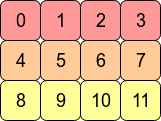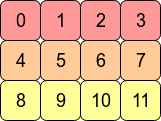

arr in memory:
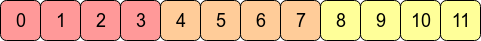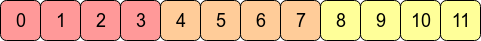

transpose of arr in memory:
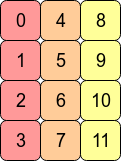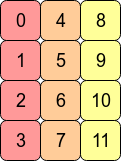

In [6]:
# Transposing the array with arr.T means that C contiguity is lost
# because adjacent row entries are no longer in adjacent memory addresses.

print(x)
x = x.transpose(0, 1)
print(x)

# A single dimension may be -1, in which case
# it’s inferred from the remaining dimensions
# and the number of elements in input.

print(x.view(-1))

tensor([[1, 2, 2],
        [2, 1, 3]])
tensor([[1, 2],
        [2, 1],
        [2, 3]])


RuntimeError: view size is not compatible with input tensor's size and stride (at least one dimension spans across two contiguous subspaces). Use .reshape(...) instead.

In [7]:
print(x.size())
print(x.is_contiguous())
r_x = torch.reshape(x, (-1,))
print(r_x)
print(r_x.is_contiguous())
print(r_x.size())

torch.Size([3, 2])
False
tensor([1, 2, 2, 1, 2, 3])
True
torch.Size([6])


In [8]:
# gets a contiguous in memory tensor
c_x = x.contiguous()
print(c_x)
print(c_x.size())
print(c_x.view(-1))
print(c_x.size())

tensor([[1, 2],
        [2, 1],
        [2, 3]])
torch.Size([3, 2])
tensor([1, 2, 2, 1, 2, 3])
torch.Size([3, 2])


In [9]:
v_c_x = c_x.view(-1)
print(v_c_x.is_contiguous())

True
